# Chebyshev Interpolation

## Interpolation error revisited

$$\renewcommand{\C}{\mathbb{C}}$$

* Error of interpolation of function $f \in \C^{n+1}[a,b]$ by n-th degree polynomial polynomial 
    $p\in P_n$ at interpolation points $x_0,\ldots,x_n$ is
    $$e(x) = p(x) - f(x) = - \frac{f^{(n+1)}(\xi)}{(n+1)!}\, w(x) $$
    where $w(x) = \prod_{i=0}^n (x-x_i)$

    * $1/(n+1)!$ suggests high degree polynomials $p$
    * $f^{(n+1)}(\xi)$ suggests smooth $f$ are approximated well
    * $w(x)$ suggest how to choose $x_i$
* this section is about the interpolation points and a choice which gives small $w(x)$

-------------------------------------------------------------------------------

* Python modules and control plotting

In [24]:
import numpy as np
import scipy as sc
import pylab as plt

%matplotlib inline
plt.rcParams['savefig.dpi'] = 75;
plt.rcParams['figure.dpi']  = 200;
plt.tight_layout();
plt.rcParams['figure.figsize'] = 12, 4;

<Figure size 1200x800 with 0 Axes>

## $w(x)$ for equidistant points

In [25]:
xk = np.linspace(-1,1,11) # equidistant interp. points

def w(x,xk=xk):
    wx = 1.0
    nk = xk.shape[0]
    for k in range(nk):
        wx = wx*(x-xk[k])
    return wx

xg = np.linspace(-1,1,257) # for display
yg = w(xg)

# Suggestion: think about how to make w(x) faster ...

--------------------------------------

### problem:  value of $w(x)$ is large close to the boundaries

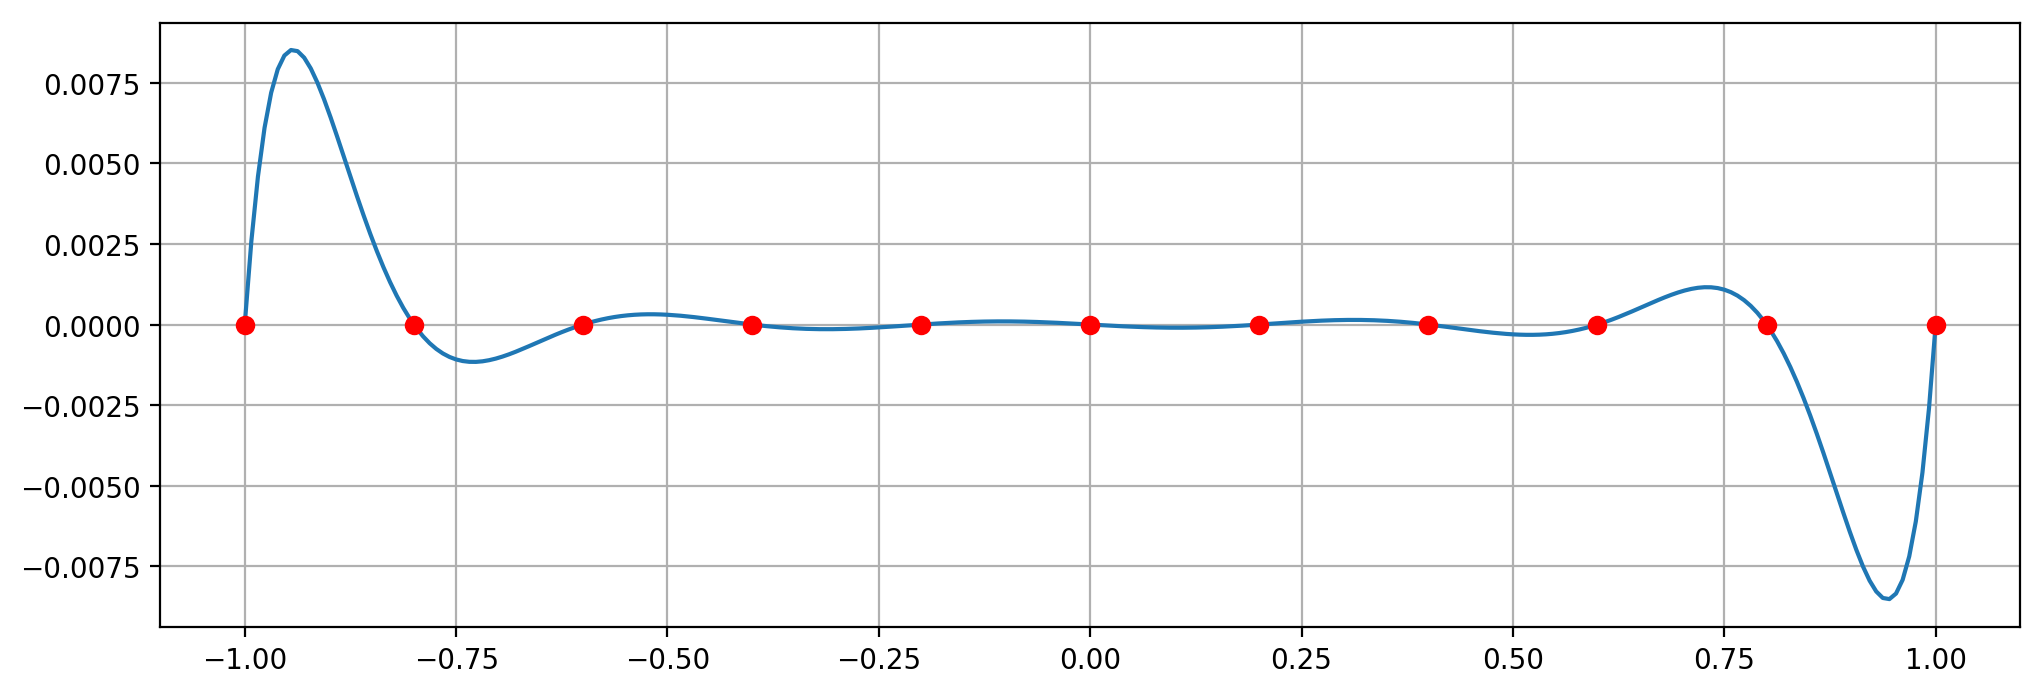

In [26]:
plt.plot(xg,yg,xk,np.zeros(xk.shape[0]),'ro')
plt.grid(True)

## Chebyshev points

* idea: choose more points close to the boundary
* motivation: on the circle, equidistant points are optimal
* Chebyshev points = x-coordinates of equidistant circular points

$$x_k = \cos\left(\frac{2k+1}{2n+2}\,\pi\right), \quad k=0,\ldots,n$$

### Example $n=0$

$$x_0 = \cos(\pi/2) = 0$$

### Example $n=1$

\begin{align*}
  x_0 &= \cos(\pi/4) = 1/\sqrt{2} \\
  x_1 &= \cos(3\pi/4) = - 1/\sqrt{2}
\end{align*}


see [https://en.wikipedia.org/wiki/Chebyshev_nodes]


## $w(x)$ for Chebyshev points

In [27]:
nk = 10
xkc = np.cos(np.linspace(np.pi/(2*nk+2.0),
                         np.pi*(2*nk+1.0)/(2*nk+2.0),nk+1))

xg = np.linspace(-1,1,257)
yg = w(xg,xkc)

----------------------------

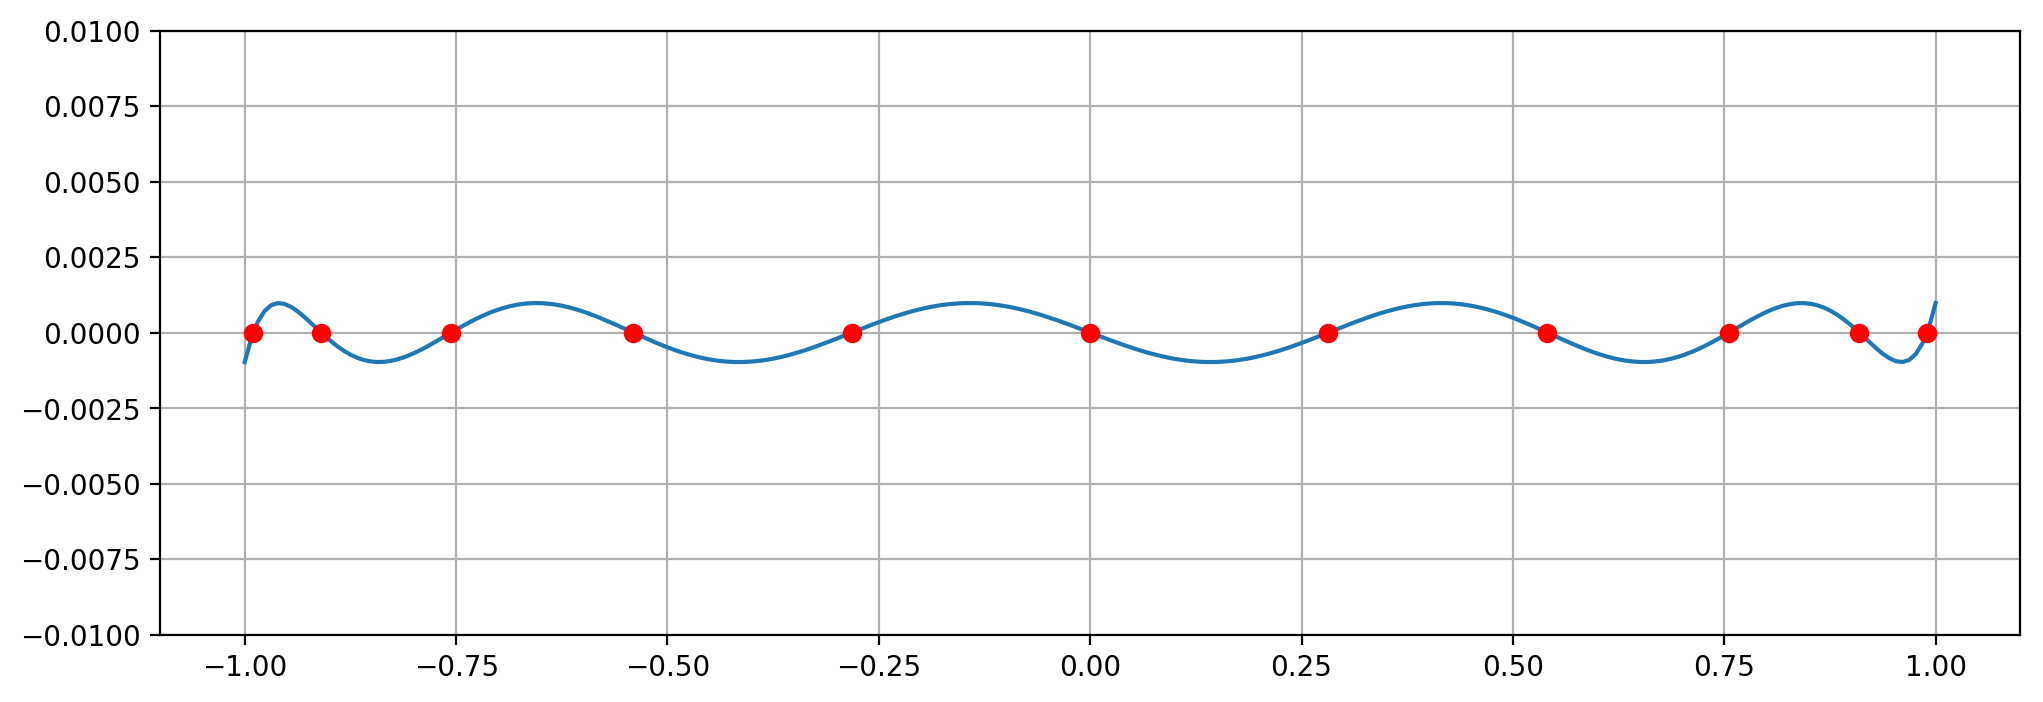

In [28]:
plt.plot(xg,yg,xkc,np.zeros(xkc.shape[0]),'ro')
plt.axis(ymin=-0.01,ymax=0.01)
plt.grid(True)

## Chebyshev polynomials

$$T_n(x) = \cos(n\arccos(x))$$

* Examples:

\begin{align*}
  T_0(x) &= 1 \\
  T_1(x) &= x \\
  T_2(x) &= 2x^2 - 1 \\
  T_3(x) &= 4x^3 - 3x
\end{align*}

* obviously, $T_n$ are polynomials of degree $n$ for $n=0,1,2,3$

* naming $T_n$ (instead of $C_n$) due to earlier transliteration from Russian as Tshebyshev
   (or Tschebyscheff in German)

## Induction: all $T_n(x)$ are polynomials

* addition theorem of $\cos$ for $T_{n+1}$ and $T_{n-1}$

\begin{align*} 
  T_{n+1}(x) &= \cos((n+1)\arccos(x)) \\
             &= \cos(n\arccos(x)) \cos(\arccos(x))\\ & \quad - \sin(n\arccos(x))\sin(\arccos(x)) \\
             &= x T_n(x) - \sin(n\arccos(x))\sin(\arccos(x) \\
  T_{n-1}(x) &= \cos((n-1)\arccos(x)) \\
             &= x T_n(x) + \sin(n\arccos(x))\sin(\arccos(x) 
\end{align*}

* add the two results to get recursion

$$T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x)$$

* thus: $T_n(x)$ is a polynomial of degree $n$ and for $n\geq 1$:
   $$T_n(x) = 2^{n-1} x^n + \cdots $$

## The zeros of $T_{n+1}(x)$

$$T_{n+1}(x_k) = \cos((n+1)\,\arccos(x_k)) = 0$$

and so

$$(n+1)\, \arccos(x_k) = \frac{\pi}{2} + k\pi$$

thus

$$x_k = \cos\left(\frac{2k+1}{2n+2}\pi\right)$$

* we get the Chebyshev points for $k=0,\ldots n$
* then the function $w(x)$ for interpolation with the Chebyshev points $x_0,\ldots,x_n$ is
  $$w(x) = 2^{-n} T_{n+1}(x)$$

## The error bound for Chebyshev points

* insert the formula for $w(x)$ into the error formula for polynomial interpolation

    $$e(x) = p(x) - f(x) = -\frac{f^{(n+1)}(\xi)}{2^{n}\,(n+1)!}\, T_{n+1}(x)$$

* as $T_{n+1}(x) = \cos((n+1)\arccos(x))$ its values are in $[-1,1]$ and so one gets the
  error bound
  
$$|e(x)| \leq  \frac{1}{2^n(n+1)!}\, \sup_{x\in[-1,1]} |f^{(n+1)}(x)|$$

### Example $n=1$

$$|e(x)| \leq  \frac{1}{4}\, \sup_{x\in[-1,1]} |f^{(2)}(x)|$$

bound for equidistant points $x_{0,1} = \pm 1$: $|e(x)| \leq 0.5 \sup_x |f^{(2)}(x)|$


## Chebyshev points and for interval $[a,b]$


* transform interval $[-1,1]$ to $[a,b]$

  $$ x \rightarrow z = \frac{a+b}{2} + \frac{b-a}{2} \, x$$

* gives Chebyshev interpolation points

$$z_k = \frac{a+b}{2} + \frac{b-a}{2} \cos\left(\frac{2k+1}{2k+2}\,\pi\right)$$

### Example $[0,1]$

$$z_k = 0.5 + 0.5 \cos\left(\frac{2k+1}{2k+2}\,\pi\right)$$


## Error bound for interval $[a,b]$

* note the transformation of the derivative (and corresponding formula for higher derivatives)

   $$f^\prime(x) = \frac{b-a}{2} f^\prime(z)$$

* insert this into error bound for interval $[-1,1]$ to get

 $$|p(x)-f(x)|\leq \frac{1}{2^n(n+1)!}\left(\frac{b-a}{2}\right)^{n+1} 
  \max_{a \leq x \leq b}|f^{(n+1)}(x)|$$

### Example $[0,1]$, $n=2$

 $$|p(x)-f(x)|\leq \frac{1}{192} \max_{a\leq x\leq b}|f^{(3)}(x)|$$


## Maxima and Minima of Chebyshev polynomials

* recall $$T_n(x) = \cos(n \arccos(x))$$
* maxima/minima of $\cos(y)$ occur for $y = k\pi$
* thus maxima/minima of $T_n(x)$ occur for $n \arccos(\overline{x}_k) = k \pi$ and so
   $$\overline{x}_k = \cos(k\pi/n)$$
   
------------------------------------------   

In [29]:
# Degree n interpolation with Chebyshev points and Chebyshev polynomials

np.set_printoptions(precision = 2)
n = 10

# Chebyshev points
xkc = np.cos(np.linspace(np.pi/(2*n+2.0),\
                         np.pi*(2*n+1.0)/(2*n+2.0),n+1))

def T(x,n=n+1): # Chebyshev polynomials
    if n==0:
        return 1.0
    elif n==1:
        return x
    else:
        return 2*x*T(x,n-1) - T(x,n-2)

# check that T is zero at the Chebyshev points
print(T(xkc))

[-3.50e-15 -1.78e-15 -1.11e-16 -1.11e-15  8.88e-16 -6.74e-16  2.89e-15
  1.11e-15  2.00e-15 -4.33e-15  3.50e-15]


## Discrete Orthogonality

If $x_k$ for $k=1,2,...m$ are $m$ zeros of $T_m(x)$, and assuming that $i,j < m$ then $$\sum_{k=1}^{m} T_i(x_k) T_j(x_k)=\left\{ \begin{array}{ll}
                                           0 & i\neq j \\
                                           \frac{m}{2} & i=j\neq 0 \\
                                           m & i=j=0
                                          \end{array}
                                 \right.$$ which is a discrete orthogonality relation.

* Question: Why does this hold?

* It follows that the interpolation matrix $A$ with elements $a_{k,j} = T_j(x_k)$ is orthogonal, and 
    $D= A^T A$ is then a diagonal matrix
    
* Thus the interpolation problem $Ac = y$ is solved by solving
    $$D c = A^T y$$

-----------------------------------------

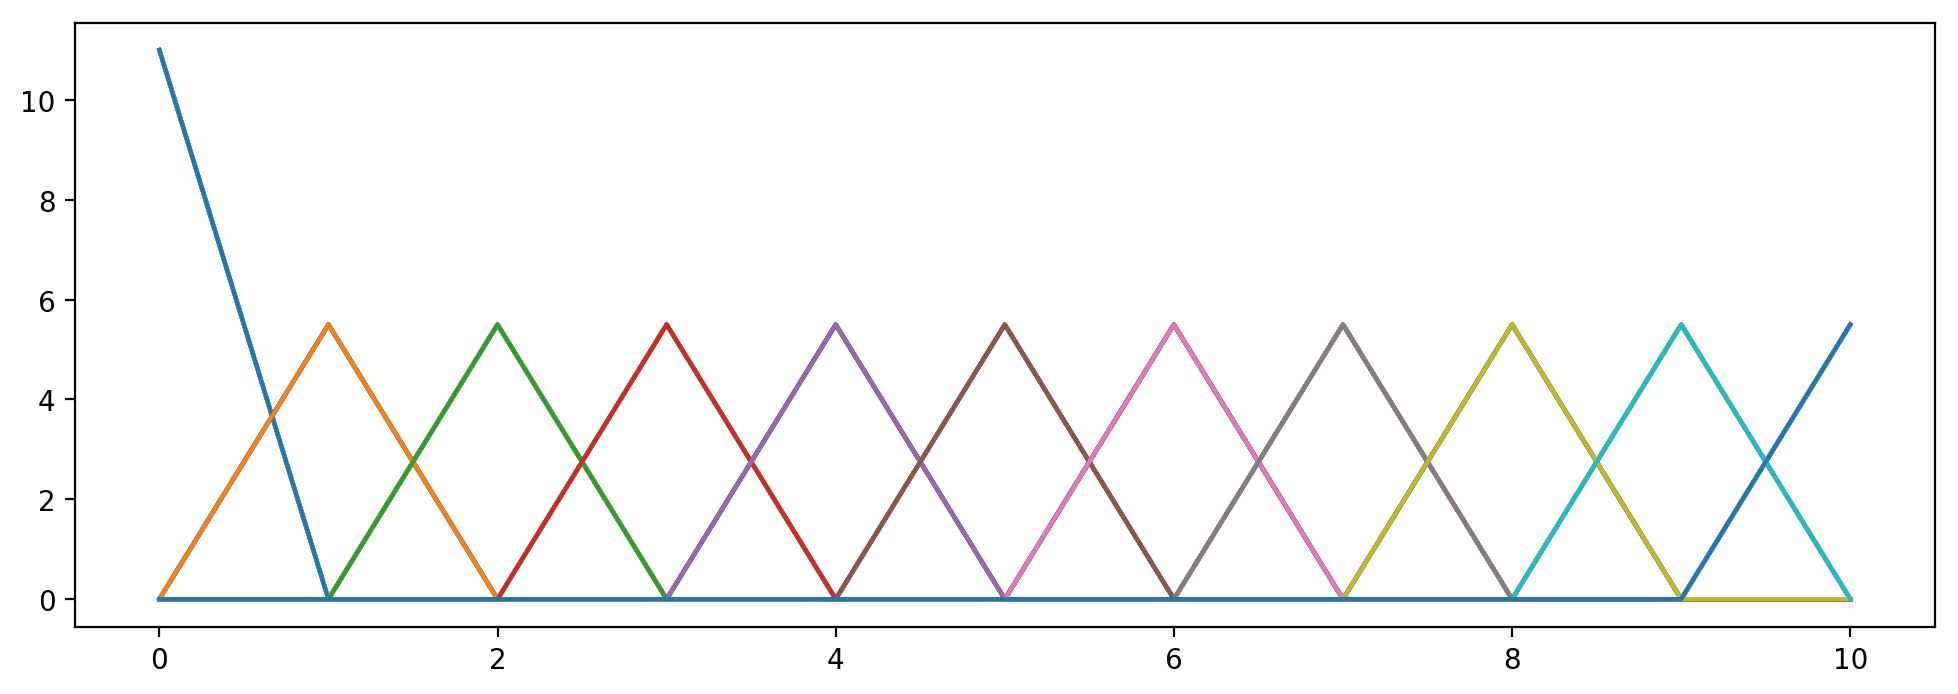

In [30]:
# Collocation matrix for Chebyshev polynomials
A = np.zeros((n+1,n+1))
for k in range(n+1): A[:,k] = T(xkc,k)
# check the orthogonality of A
for j in range(n+1):    plt.plot(np.dot(A.T,A))

## Solving interpolation problem with Chebyshev polynomials

In [31]:
f = lambda x : 1.0/(25*x*x+1)
ykc = f(xkc)   # function values

aty = np.dot(A.T,ykc)  # A.T times rhs
ata = np.dot(A.T, A)   # normal matrix (is diagonal)

c = aty/np.diag(ata)   # coeffs of Chebyshev polynomials

print(c)   #every second coefficient is zero, why?

[ 2.01e-01  6.77e-19 -2.74e-01  4.10e-18  1.91e-01  1.36e-17 -1.37e-01
  6.80e-17  1.06e-01 -1.24e-16 -9.11e-02]


-------------------------------

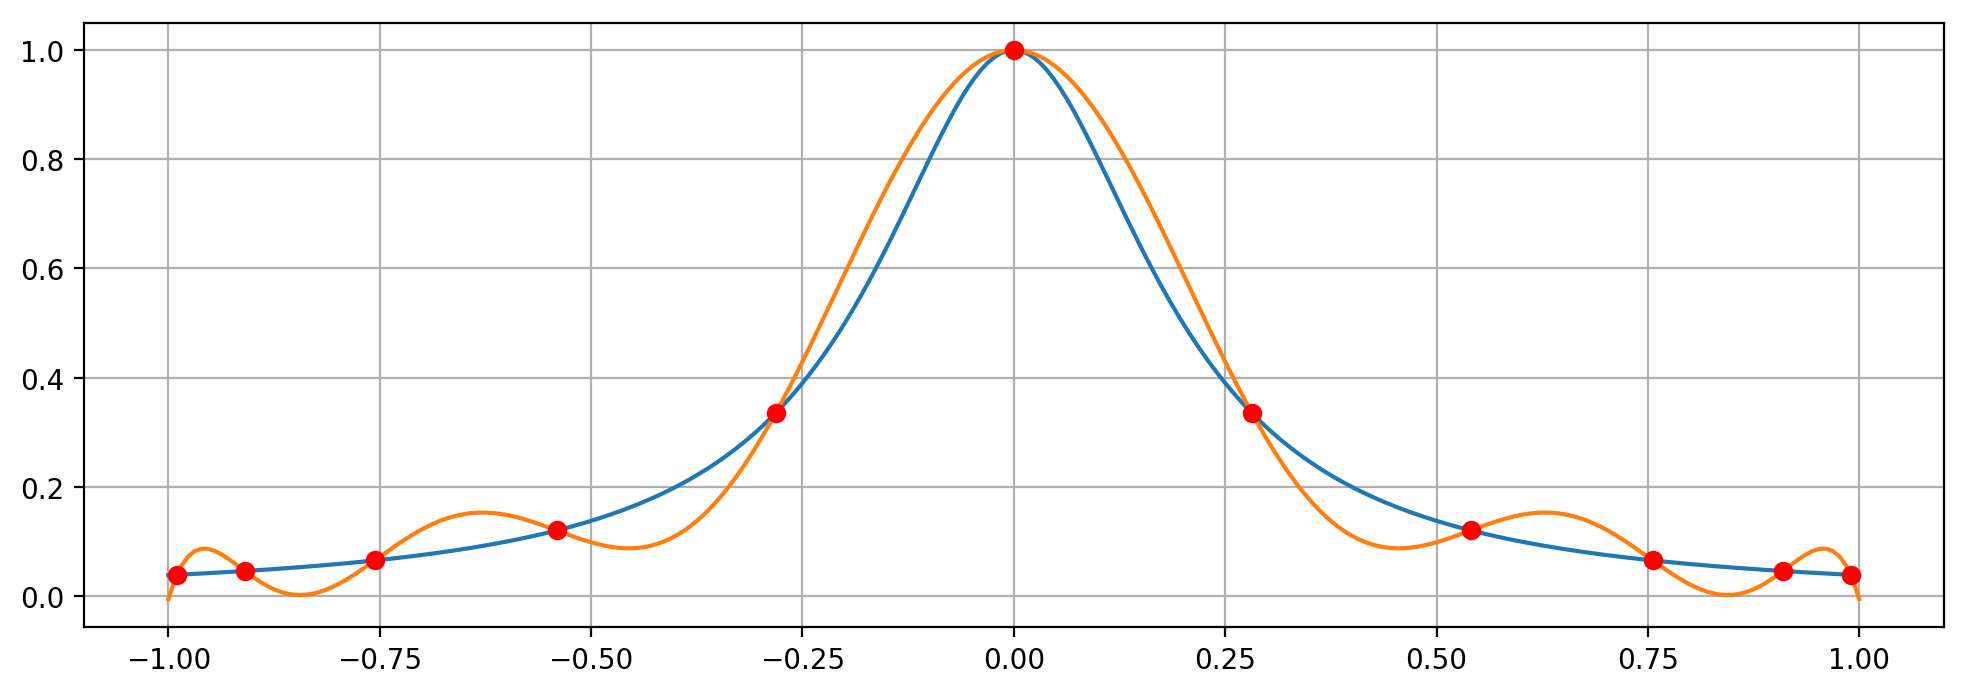

In [32]:
xg = np.linspace(-1,1,257)
yg = np.zeros(257)
for k in range(n+1):
    yg += c[k]*T(xg,k)

plt.plot(xg, f(xg),xg,yg,xkc,ykc,'ro')
plt.grid(True)

<!--

## Continuous Orthogonality

It also satisfies a continuous orthogonality relation on the interval $[-1,1]$, and over a weight $(1-x^2)^{-1/2}$. $$\int_{-1}^{1} \frac{T_i(x) T_j(x)}{\sqrt{1-x^2}} dx=\left\{\begin{array}{ll}
                                 0 & i\neq j \\
                                 \frac{\pi}{2} & i=j\neq 0 \\
                                  \pi & i=j=0
                                    \end{array}
                                 \right. .$$

## Constructing a Chebyshev Interpolating Polynomial

If $f(x)$ is an arbitrary function in the interval $[-1,1]$, and if $N$ coefficients $c_j$ with $j=0, ...,N-1$ are defined by $$\begin{aligned}
c_j&=&\frac{2}{N}\sum_{k=1}^N f(x_k)T_j(x_k) \nonumber \\
 &=&\frac{2}{N}\sum_{k=1}^N f\left[\cos\left(\frac{\pi(k-\frac{1}{2})}{N}\right)\right]
       \cos\left(\frac{\pi j(k-\frac{1}{2})}{N}\right) \nonumber\end{aligned}$$ then the approximation formula $$f(x) \approx \left[ \sum_{k=0}^{N-1} c_k T_k(x) \right] -\frac{1}{2}c_0$$ is exact for $x$ equal to all the $N$ zeros of $T_N(x)$.

This representation may not necessarily be the polynomial exact at all nodes, however it can be truncated (and thus easily calculated) to provide a polynomial of degree $m$ much less than $N$, which does provide the best approximation at degree $m.$

Consider the truncated series $$f(x) \approx \left[ \sum_{k=0}^{m-1} c_k T_k(x) \right] -\frac{1}{2}c_0$$ of a function which is nearly perfectly represented by the infinite series. Since we have $|T_k(x)| \leq 1$, the error can be no larger than the sum of the truncated $c_k$’s. If these $c_k$’s are decreasing (a typical scenario) then the dominant term is $c_mT_m(x)$, which is oscillatory with $m+1$ extrema equally spaced over the interval. This smooth distribution is extremely important as it close to minimises the maximum deviation from the true function.

Thus, in order to implement this process for the estimation of some function $f(x)$, we need to evaluate the $c_j$’s of the theorem definition, and from inspection decide on a truncating value $m$. Then $f$ can be computed. For functions between some arbitrary limits $[a,b]$, the change of variable $$y\equiv \frac{x-\frac{1}{2}(b-a)}{\frac{1}{2}(b-a)}$$ (which we saw above) and estimate of $f$ by a Chebyshev polynomial in $y$, will provide the result.

This method works well in many cases. Further, it is known that any continuous function on any interval $[a,b]$ can be approximated arbitrarily well by polynomials, in the sense that the maximum error over the whole interval can be made as small as one likes \[this is the Weierstrass Approximation Theorem\]. However, collocation at these Chebyshev nodes will not work for all continuous functions: indeed no choice of points will work for all cases (for proof see Theorem 6 on page 288 of Kincaid and Cheney). One way to understand the problem is that the error bound relies on derivatives of ever higher order, so does not even apply to some continuous functions.

This suggests a new strategy: break the interval $[a,b]$ into smaller intervals, approximate on each interval by a polynomial of some small degree, and join these polynomials together. Hopefully, the errors will only depend on a few derivatives, and so will be more controllable, while using enough nodes and small enough intervals will allow the errors to be made as small as desired.
-->

<!-- end of NB3.3 -->